## **Pytorch fundamentals**

In [159]:
import torch
import pandas as pd
import numpy as np

#Displaying data
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.__version__)

1.13.1+cu116


In [160]:
#0D 1D lowercase, 2D 3D UPPERCASE
scalar = torch.tensor(7) #Single number 0D
vector = torch.tensor([7,7]) #Array 1D
MATRIX = torch.tensor([[7,7], 
                       [7,7]]) #Matrix 2D
print(MATRIX.ndim) #Dimension
print(MATRIX.shape) 
TENSOR = torch.tensor([[[7,7,7],[7,7,7],[7,7,7]], 
                       [[7,7,7],[7,7,7],[7,7,7]], 
                       [[7,7,7],[7,7,7],[7,7,7]]]) #Tensor 3D
TENSOR.shape

2
torch.Size([2, 2])


torch.Size([3, 3, 3])

In [161]:
#Random tensors Good for starting
random_tensor = torch.rand(2, 2, 2) #3, 4 is the shape
random_tensor

tensor([[[0.8508, 0.6256],
         [0.5615, 0.1288]],

        [[0.1285, 0.7011],
         [0.0983, 0.3386]]])

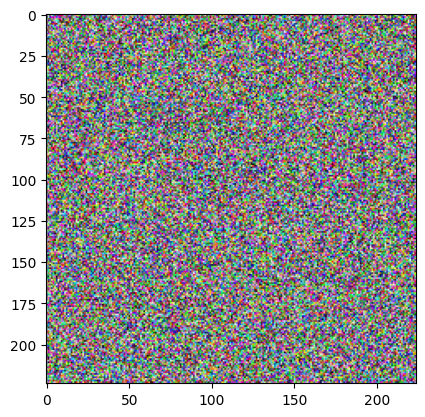

In [162]:
random_img = torch.rand(224, 224, 3)
plt.imshow(random_img)

In [163]:
zeros = torch.zeros(224, 224, 3)
ones = torch.ones(224, 224, 3)
one_to_ten = torch.arange(0,11, 2) #Start, End, Step
torch.zeros_like(one_to_ten) 

tensor([0, 0, 0, 0, 0, 0])

In [164]:
float_32_tensor = torch.tensor([4.0, 3.0, 5.0],
                               dtype=torch.float32, #Data type, default float 32 
                               device="cuda", #The device
                               requires_grad=False#Track gradients?
                               )
float_16_tensor = float_32_tensor.type(torch.float16) #Converting
float_16_tensor.device 

device(type='cuda', index=0)

In [165]:
#Great visualizer for matrix multiplication
# http://matrixmultiplication.xyz/
a = torch.tensor([1, 2, 3])
b = torch.tensor([3, 2, 1])
a + b, a * 10, a.mul(10), a - b, a.matmul(b)

matrix_a = torch.tensor([[2, 2], 
                         [2, 2]])
matrix_b = torch.tensor([[2, 2], 
                         [2, 4]])
matrix_a.matmul(matrix_b)
#Inner dimension must match
#Outer dimension will match result shape

tensor([[ 8, 12],
        [ 8, 12]])

In [166]:
torch.mm(torch.rand(3, 2), torch.rand(2, 3))

tensor([[0.0843, 0.1596, 0.2157],
        [0.2620, 0.6475, 0.3398],
        [0.1147, 0.2285, 0.2685]])

In [167]:
matrix_a = torch.tensor([[1, 2], 
                         [2, 3],
                         [4, 5]])
matrix_b = torch.tensor([[2, 3], 
                         [4, 5],
                         [6, 7]])
matrix_b = matrix_b.T # Without this error, flips shape
matrix_a.mm(matrix_b)

tensor([[ 8, 14, 20],
        [13, 23, 33],
        [23, 41, 59]])

In [168]:
x = torch.rand(30)
#Mean means avaerage
#argmin find position
x[x.argmax()] == x.max(), x.argmin(), x.mean(), x.median()

(tensor(True), tensor(5), tensor(0.4953), tensor(0.4668))

In [169]:
#x.type(torch.int16)

In [170]:
#View reshapes if possible
x = torch.rand(3, 3)
x = x.view(1, 9)
x.shape

torch.Size([1, 9])

In [171]:
x_stacked = torch.stack([x, x, x])
x_stacked = x_stacked.squeeze()
x_stacked.shape, x_stacked.unsqueeze(2).shape

(torch.Size([3, 9]), torch.Size([3, 9, 1]))

In [172]:
x.shape, x.permute(1, 0).shape

(torch.Size([1, 9]), torch.Size([9, 1]))

In [173]:
x = torch.arange(1, 28).reshape(3, 3, 3)
x, x[:, 2, 2]


(tensor([[[ 1,  2,  3],
          [ 4,  5,  6],
          [ 7,  8,  9]],
 
         [[10, 11, 12],
          [13, 14, 15],
          [16, 17, 18]],
 
         [[19, 20, 21],
          [22, 23, 24],
          [25, 26, 27]]]),
 tensor([ 9, 18, 27]))

In [174]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array).type(torch.float32)

In [181]:
#Taking the random out of random
RANDOM_SEED=42
torch.manual_seed(32)
torch.rand(3,2)

tensor([[0.8757, 0.2721],
        [0.4141, 0.7857],
        [0.1130, 0.5793]])

In [187]:
torch.cuda.device_count()
torch.rand(3,3, device="cuda")
#NOTE numpy can't use gpu
#Change device to cpu then .numpy()

tensor([[0.4832, 0.1746, 0.8292],
        [0.1073, 0.6775, 0.9132],
        [0.0308, 0.3551, 0.7141]], device='cuda:0')